In [25]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.model_selection import ShuffleSplit
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [26]:
data = pd.read_csv('heart.csv')

In [27]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Text(0.5, 1.0, 'Распределения заболевания между мужчинами и женщинами')

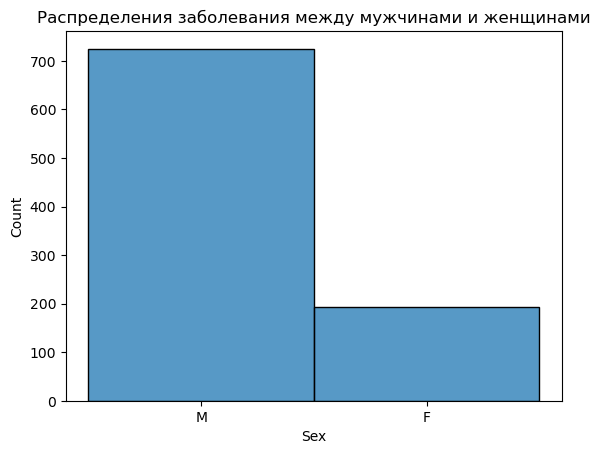

In [29]:
sns.histplot(data['Sex'])
plt.title("Распределения заболевания между мужчинами и женщинами")

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
# Преобразование категориальных признаков
label = LabelEncoder()
data['Sex'] = label.fit_transform(data['Sex'])
data['ExerciseAngina'] = label.fit_transform(data['ExerciseAngina'])
data['ST_Slope'] = label.fit_transform(data['ST_Slope'])

In [32]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,2,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,1,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,2,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,1,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,0,1.2,1,1
914,68,1,ASY,144,193,1,Normal,141,0,3.4,1,1
915,57,1,ASY,130,131,0,Normal,115,1,1.2,1,1
916,57,0,ATA,130,236,0,LVH,174,0,0.0,1,1


In [33]:
# Преобразование категориальных признаков
data = pd.get_dummies(data, prefix=None, prefix_sep='_', drop_first=True)

In [34]:
df_m = data.loc[((data['HeartDisease'] == 1) | (data['Sex'] == 0))]
df_f = data.loc[((data['HeartDisease'] == 1) | (data['Sex'] == 1))]

Text(0.5, 1.0, 'Распределения заболевания у мужчин')

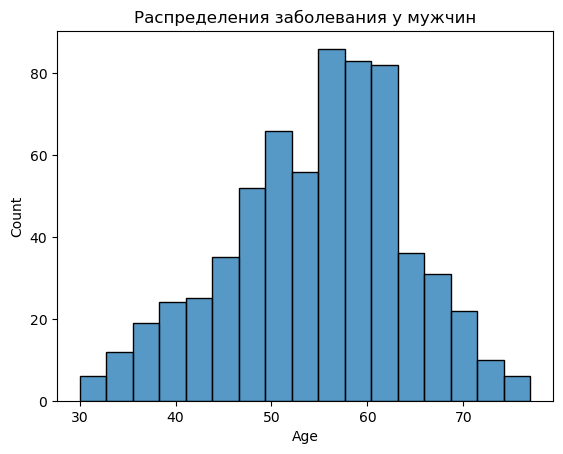

In [35]:
import seaborn as sns
sns.histplot(df_m['Age'])
plt.title("Распределения заболевания у мужчин")

Text(0.5, 1.0, 'Распределения заболевания у женщин')

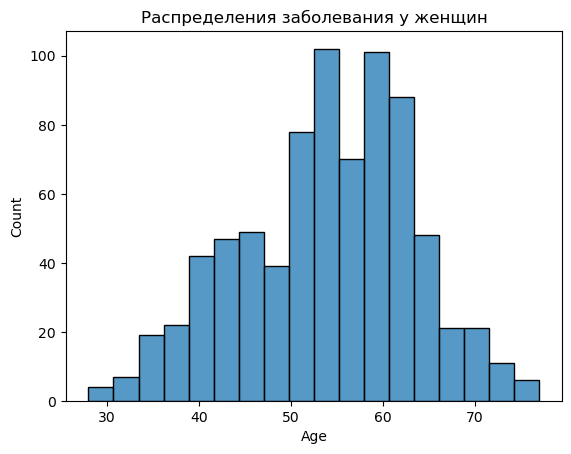

In [36]:
sns.histplot(df_f['Age'])
plt.title("Распределения заболевания у женщин")

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   Sex                918 non-null    int64  
 2   RestingBP          918 non-null    int64  
 3   Cholesterol        918 non-null    int64  
 4   FastingBS          918 non-null    int64  
 5   MaxHR              918 non-null    int64  
 6   ExerciseAngina     918 non-null    int64  
 7   Oldpeak            918 non-null    float64
 8   ST_Slope           918 non-null    int64  
 9   HeartDisease       918 non-null    int64  
 10  ChestPainType_ATA  918 non-null    uint8  
 11  ChestPainType_NAP  918 non-null    uint8  
 12  ChestPainType_TA   918 non-null    uint8  
 13  RestingECG_Normal  918 non-null    uint8  
 14  RestingECG_ST      918 non-null    uint8  
dtypes: float64(1), int64(9), uint8(5)
memory usage: 76.3 KB


In [38]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='HeartDisease'),
                                                    data['HeartDisease'],
                                                    test_size=0.2,
                                                    random_state=42)

Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        77
           1       0.87      0.85      0.86       107

    accuracy                           0.84       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184

Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



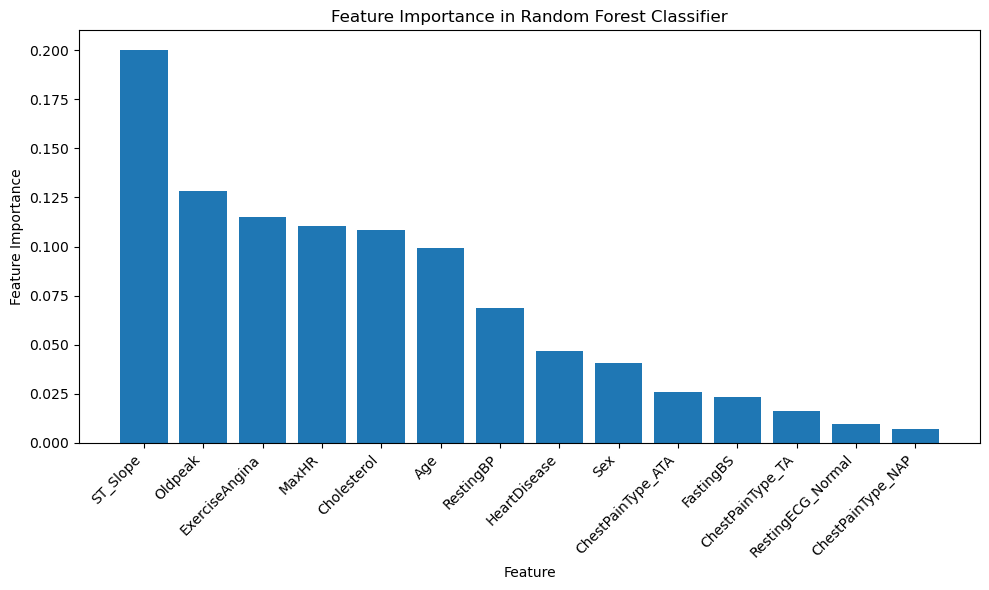

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Обучение модели DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)
tree_report = classification_report(y_test, tree_predictions)

# Обучение модели RandomForestClassifier
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)
forest_predictions = forest_model.predict(X_test)
forest_report = classification_report(y_test, forest_predictions)

# Вывод метрик для моделей
print("Decision Tree Classifier Report:")
print(tree_report)

print("Random Forest Classifier Report:")
print(forest_report)

# Важность признаков для RandomForestClassifier
feature_importances = forest_model.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]  # Сортируем важности по убыванию
feature_names = list(data.columns)

# Визуализация важности признаков в виде столбчатой диаграммы с наименованиями признаков
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices])
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in sorted_indices], rotation=45, ha="right")
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Feature Importance in Random Forest Classifier")
plt.tight_layout()
plt.show()


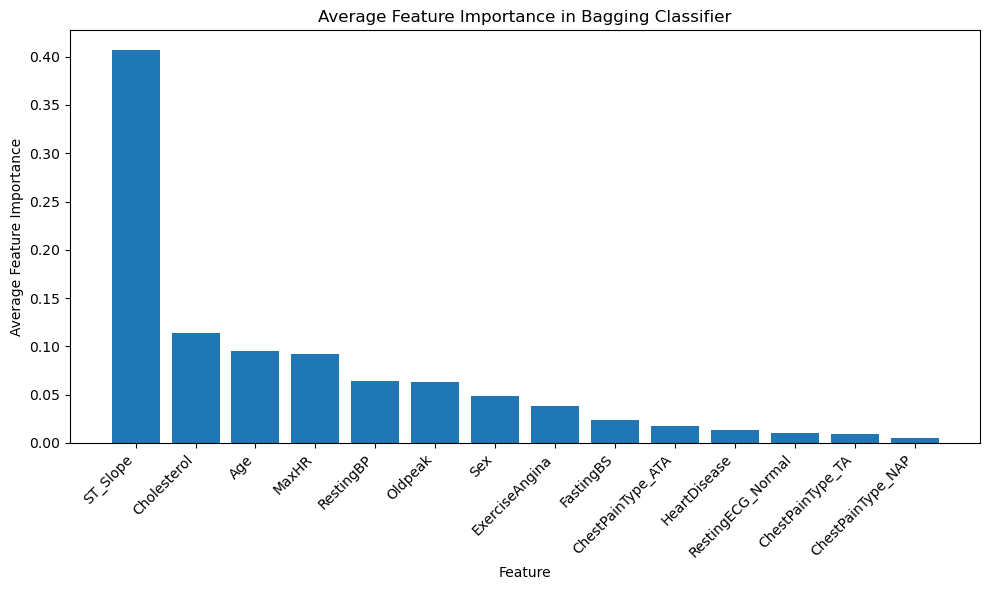

Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        77
           1       0.87      0.85      0.86       107

    accuracy                           0.84       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184

Bagging Classifier Report:
              precision    recall  f1-score   support

           0       0.76      0.90      0.82        77
           1       0.91      0.79      0.85       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



In [40]:
from sklearn.ensemble import BaggingClassifier

# Обучение модели BaggingClassifier над DecisionTreeClassifier
bagging_model = BaggingClassifier(base_estimator=tree_model, n_estimators=10)
bagging_model.fit(X_train, y_train)
bagging_predictions = bagging_model.predict(X_test)
bagging_report = classification_report(y_test, bagging_predictions)

# Важность признаков для BaggingClassifier
feature_importances = bagging_model.estimators_[0].feature_importances_
for estimator in bagging_model.estimators_[1:]:
    feature_importances += estimator.feature_importances_
average_feature_importances = feature_importances / len(bagging_model.estimators_)
sorted_indices = average_feature_importances.argsort()[::-1]  # Сортируем важности по убыванию
feature_names = list(data.columns)

# Визуализация важности признаков в виде столбчатой диаграммы с наименованиями признаков
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), average_feature_importances[sorted_indices])
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in sorted_indices], rotation=45, ha="right")
plt.xlabel("Feature")
plt.ylabel("Average Feature Importance")
plt.title("Average Feature Importance in Bagging Classifier")
plt.tight_layout()
plt.show()

# Вывод метрик для моделей
print("Decision Tree Classifier Report:")
print(tree_report)

print("Bagging Classifier Report:")
print(bagging_report)


In [41]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC


# Определяем базовые модели
base_models = [
    ('decision_tree', DecisionTreeClassifier()),
    ('random_forest', RandomForestClassifier()),
    ('linear_svc', LinearSVC())
]

# Определияем мета-модель
meta_model = DecisionTreeClassifier()

# Создаем стекинг классификатор
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Обучаем стекинг модель
stacking_model.fit(X_train, y_train)

# Получаем предсказания стекинг модели
stacking_predictions = stacking_model.predict(X_test)

# Выводим метрики для стекинг модели
stacking_report = classification_report(y_test, stacking_predictions)
print("Stacking Classifier Report:")
print(stacking_report)


/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Stacking Classifier Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81        77
           1       0.85      0.88      0.87       107

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Лучше всего отработала модель Random Forest Classifier